
Simulation with LTV_WETH: 0.5, LTV_USDC: 0.8
Liquidation Threshold WETH: 0.53, USDC: 0.8300000000000001
Liquidation Bonus: 1.05
Initial WETH price: $2000
Deposited 10000 USDC
Deposited 5.0 WETH
Borrowed 4000.0 USDC

Initial state:
USDC pool: 6000.0
WETH pool: 5.0
Borrowed USDC: 4000.0

WETH price dropped to $1800.00
New Health Factor: 1.1925

No liquidation needed. Protocol remains solvent.

Simulation with LTV_WETH: 0.5, LTV_USDC: 0.8
Liquidation Threshold WETH: 0.53, USDC: 0.8300000000000001
Liquidation Bonus: 1.1
Initial WETH price: $2000
Deposited 10000 USDC
Deposited 5.0 WETH
Borrowed 4000.0 USDC

Initial state:
USDC pool: 6000.0
WETH pool: 5.0
Borrowed USDC: 4000.0

WETH price dropped to $1800.00
New Health Factor: 1.1925

No liquidation needed. Protocol remains solvent.

Simulation with LTV_WETH: 0.5, LTV_USDC: 0.8
Liquidation Threshold WETH: 0.53, USDC: 0.8300000000000001
Liquidation Bonus: 1.15
Initial WETH price: $2000
Deposited 10000 USDC
Deposited 5.0 WETH
Borrowed 4000.0 

,Price Drop,LTV WETH,LTV USDC,Liquidation Threshold WETH,Liquidation Threshold USDC,Liquidation Bonus,Insolvent
0,10.0%,0.50,0.8,0.53,0.83,1.05,False
1,10.0%,0.50,0.8,0.53,0.83,1.10,False
2,10.0%,0.50,0.8,0.53,0.83,1.15,False
3,10.0%,0.55,0.8,0.58,0.83,1.05,False
4,10.0%,0.55,0.8,0.58,0.83,1.10,False
...,...,...,...,...,...,...,...
115,50.0%,0.80,0.8,0.83,0.83,1.10,True
116,50.0%,0.80,0.8,0.83,0.83,1.15,True
117,50.0%,0.85,0.8,0.88,0.83,1.05,True
118,50.0%,0.85,0.8,0.88,0.83,1.10,True



Insolvency rate: 23.33%


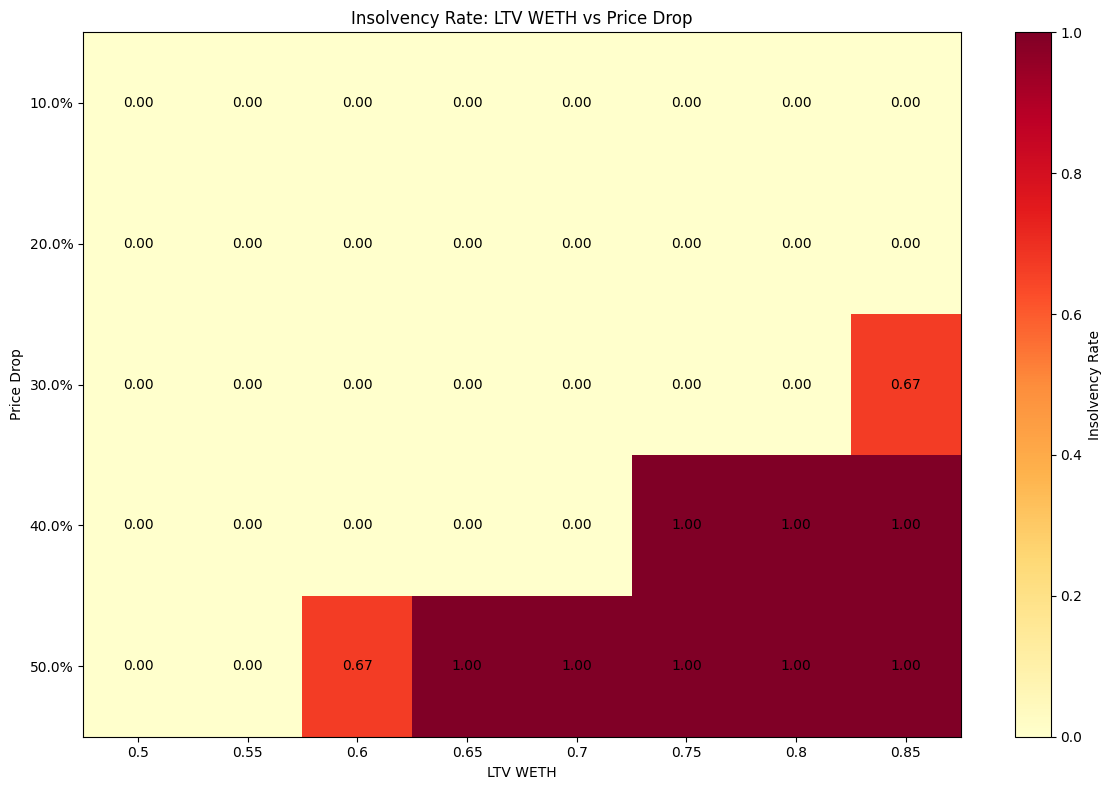

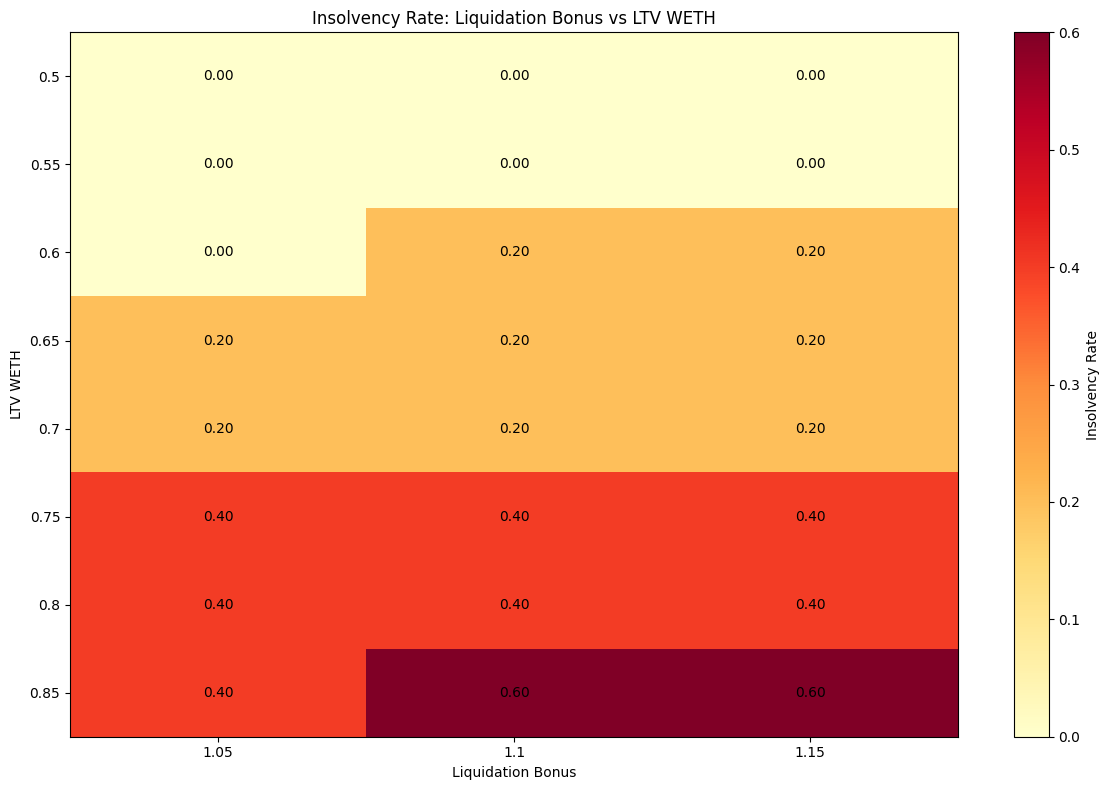

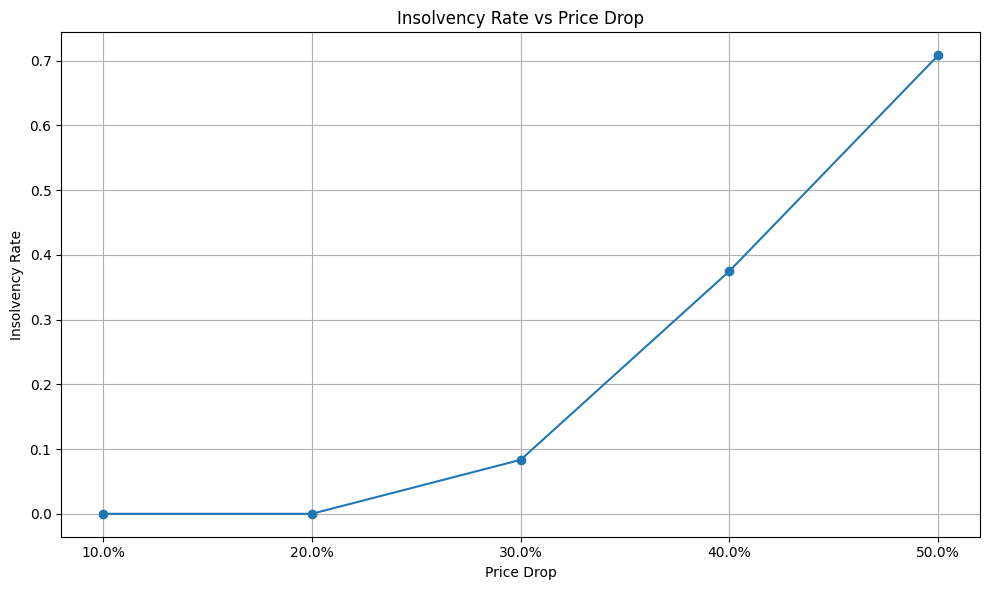

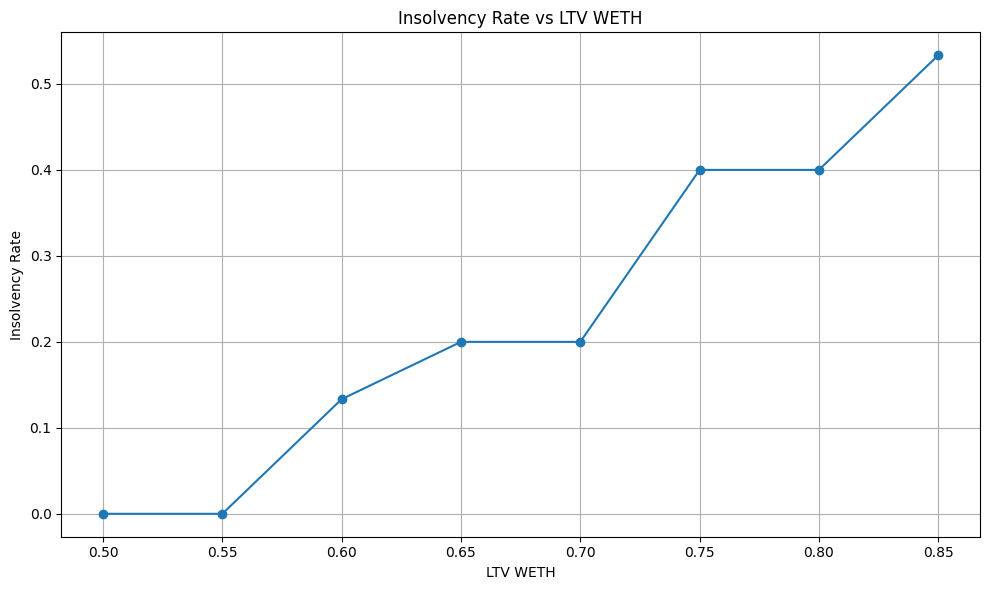

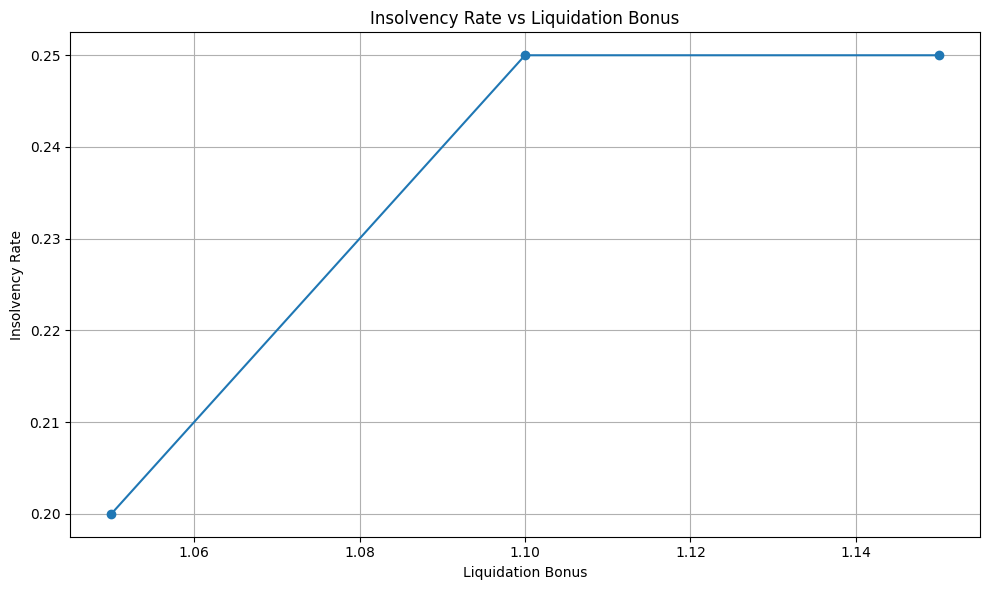


Average Insolvency Rate by Factor:

Price Drop:


Price Drop
50.0%    0.708333
40.0%    0.375000
30.0%    0.083333
10.0%    0.000000
20.0%    0.000000
Name: Insolvent, dtype: float64


LTV WETH:


LTV WETH
0.85    0.533333
0.75    0.400000
0.80    0.400000
0.65    0.200000
0.70    0.200000
0.60    0.133333
0.50    0.000000
0.55    0.000000
Name: Insolvent, dtype: float64


Liquidation Bonus:


Liquidation Bonus
1.10    0.25
1.15    0.25
1.05    0.20
Name: Insolvent, dtype: float64


Most Risky Configuration:


Price Drop                    50.0%
LTV WETH                       0.85
LTV USDC                        0.8
Liquidation Threshold WETH     0.88
Liquidation Threshold USDC     0.83
Liquidation Bonus              1.15
Insolvent                      True
Name: 119, dtype: object


Safest Configuration (highest price drop without insolvency):


Price Drop                    50.0%
LTV WETH                        0.6
LTV USDC                        0.8
Liquidation Threshold WETH     0.63
Liquidation Threshold USDC     0.83
Liquidation Bonus              1.05
Insolvent                     False
Name: 102, dtype: object

In [3]:
# Depositing Volatile and Borrowing an Stable asset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

class ZeruLendingProtocol:
    def __init__(self, ltv_weth, ltv_usdc, liq_threshold_weth, liq_threshold_usdc, liq_bonus):
        self.ltv_weth = ltv_weth
        self.ltv_usdc = ltv_usdc
        self.liq_threshold_weth = liq_threshold_weth
        self.liq_threshold_usdc = liq_threshold_usdc
        self.liq_bonus = liq_bonus
        self.usdc_pool = 0
        self.weth_pool = 0
        self.borrowed_usdc = 0
        
    def deposit(self, amount, asset):
        if asset == 'USDC':
            self.usdc_pool += amount
        elif asset == 'WETH':
            self.weth_pool += amount
        print(f"Deposited {amount} {asset}")
        
    def borrow(self, amount, collateral_value):
        if amount <= collateral_value * self.ltv_weth:
            self.borrowed_usdc += amount
            self.usdc_pool -= amount
            print(f"Borrowed {amount} USDC")
        else:
            print("Borrow amount exceeds allowed LTV")
            
    def calculate_health_factor(self, collateral_value, borrowed_amount):
        return (collateral_value * self.liq_threshold_weth) / borrowed_amount
    
    def liquidate(self, collateral_value, borrowed_amount, weth_price):
        max_liquidation = min(borrowed_amount * 0.5, collateral_value * self.liq_threshold_weth)
        debt_to_cover = max_liquidation / self.liq_bonus
        collateral_liquidated = max_liquidation / weth_price
        
        remaining_debt = borrowed_amount - debt_to_cover
        remaining_collateral_value = collateral_value - (collateral_liquidated * weth_price)
        
        print(f"Debt covered: ${debt_to_cover:.2f}")
        print(f"Collateral liquidated: {collateral_liquidated:.4f} WETH (${collateral_liquidated * weth_price:.2f})")
        print(f"Remaining debt: ${remaining_debt:.2f}")
        print(f"Remaining collateral value: ${remaining_collateral_value:.2f}")
        
        return debt_to_cover, collateral_liquidated, remaining_debt, remaining_collateral_value

def run_simulation(initial_weth_price, price_drop_percentage, ltv_weth, ltv_usdc, liq_threshold_weth, liq_threshold_usdc, liq_bonus):
    print(f"\nSimulation with LTV_WETH: {ltv_weth}, LTV_USDC: {ltv_usdc}")
    print(f"Liquidation Threshold WETH: {liq_threshold_weth}, USDC: {liq_threshold_usdc}")
    print(f"Liquidation Bonus: {liq_bonus}")
    print(f"Initial WETH price: ${initial_weth_price}")
    
    protocol = ZeruLendingProtocol(ltv_weth, ltv_usdc, liq_threshold_weth, liq_threshold_usdc, liq_bonus)
    
    # User1 deposits $10,000 USDC
    protocol.deposit(10000, 'USDC')
    
    # User2 deposits $10,000 worth of WETH
    weth_amount = 10000 / initial_weth_price
    protocol.deposit(weth_amount, 'WETH')
    
    # User2 borrows 80% of max LTV
    borrow_amount = 10000 * ltv_weth * 0.8
    protocol.borrow(borrow_amount, 10000)
    
    print(f"\nInitial state:")
    print(f"USDC pool: {protocol.usdc_pool}")
    print(f"WETH pool: {protocol.weth_pool}")
    print(f"Borrowed USDC: {protocol.borrowed_usdc}")
    
    # Price drop
    new_weth_price = initial_weth_price * (1 - price_drop_percentage)
    new_collateral_value = weth_amount * new_weth_price
    
    print(f"\nWETH price dropped to ${new_weth_price:.2f}")
    
    health_factor = protocol.calculate_health_factor(new_collateral_value, borrow_amount)
    print(f"New Health Factor: {health_factor:.4f}")
    
    if health_factor < 1:
        print("\nLiquidation triggered!")
        debt_covered, collateral_liquidated, remaining_debt, remaining_collateral_value = protocol.liquidate(new_collateral_value, borrow_amount, new_weth_price)
        
        liquidator_profit = (collateral_liquidated * new_weth_price) - debt_covered
        print(f"\nLiquidator profit: ${liquidator_profit:.2f}")
        
        if remaining_collateral_value < remaining_debt:
            protocol_loss = remaining_debt - remaining_collateral_value
            print(f"\nProtocol loss: ${protocol_loss:.2f}")
            print("Protocol is insolvent!")
            return True
        else:
            print("\nProtocol remains solvent.")
            return False
    else:
        print("\nNo liquidation needed. Protocol remains solvent.")
        return False

# Run simulations with different parameters
initial_weth_price = 2000
price_drop_percentages = [0.1, 0.2, 0.3, 0.4, 0.5]
ltv_weth_values = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
ltv_usdc_values = [0.8]
liq_bonus_values = [1.05, 1.10, 1.15]

results = []

for price_drop in price_drop_percentages:
    for ltv_weth in ltv_weth_values:
        for ltv_usdc in ltv_usdc_values:
            for liq_bonus in liq_bonus_values:
                liq_threshold_weth = ltv_weth + 0.03
                liq_threshold_usdc = ltv_usdc + 0.03
                
                is_insolvent = run_simulation(initial_weth_price, price_drop, ltv_weth, ltv_usdc, liq_threshold_weth, liq_threshold_usdc, liq_bonus)
                
                results.append({
                    'Price Drop': f"{price_drop*100}%",
                    'LTV WETH': ltv_weth,
                    'LTV USDC': ltv_usdc,
                    'Liquidation Threshold WETH': liq_threshold_weth,
                    'Liquidation Threshold USDC': liq_threshold_usdc,
                    'Liquidation Bonus': liq_bonus,
                    'Insolvent': is_insolvent
                })

# Display results in a table
results_df = pd.DataFrame(results)
display(results_df)

# Calculate and display insolvency rate
insolvency_rate = results_df['Insolvent'].mean() * 100
print(f"\nInsolvency rate: {insolvency_rate:.2f}%")

# # Analyze impact of liquidation bonus on insolvency
# bonus_impact = results_df.groupby('Liquidation Bonus')['Insolvent'].mean().sort_values(ascending=False)
# print("\nImpact of Liquidation Bonus on Insolvency:")
# display(bonus_impact)

# # Analyze impact of LTV on insolvency
# ltv_impact = results_df.groupby('LTV WETH')['Insolvent'].mean().sort_values(ascending=False)
# print("\nImpact of LTV WETH on Insolvency:")
# display(ltv_impact)

# # Analyze impact of price drop on insolvency
# price_drop_impact = results_df.groupby('Price Drop')['Insolvent'].mean().sort_values(ascending=False)
# print("\nImpact of Price Drop on Insolvency:")
# display(price_drop_impact)

# Visualization functions
def plot_insolvency_heatmap(df, x_col, y_col, title):
    pivot = df.pivot_table(values='Insolvent', index=y_col, columns=x_col, aggfunc='mean')
    plt.figure(figsize=(12, 8))
    plt.imshow(pivot, cmap='YlOrRd', aspect='auto')
    plt.colorbar(label='Insolvency Rate')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)
    for i in range(len(pivot.index)):
        for j in range(len(pivot.columns)):
            plt.text(j, i, f"{pivot.iloc[i, j]:.2f}", ha='center', va='center')
    plt.tight_layout()
    plt.show()

def plot_insolvency_line(df, x_col, title):
    grouped = df.groupby(x_col)['Insolvent'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(grouped.index, grouped.values, marker='o')
    plt.xlabel(x_col)
    plt.ylabel('Insolvency Rate')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate visualizations
plot_insolvency_heatmap(results_df, 'LTV WETH', 'Price Drop', 'Insolvency Rate: LTV WETH vs Price Drop')
plot_insolvency_heatmap(results_df, 'Liquidation Bonus', 'LTV WETH', 'Insolvency Rate: Liquidation Bonus vs LTV WETH')
plot_insolvency_line(results_df, 'Price Drop', 'Insolvency Rate vs Price Drop')
plot_insolvency_line(results_df, 'LTV WETH', 'Insolvency Rate vs LTV WETH')
plot_insolvency_line(results_df, 'Liquidation Bonus', 'Insolvency Rate vs Liquidation Bonus')

# Additional analysis
print("\nAverage Insolvency Rate by Factor:")
for factor in ['Price Drop', 'LTV WETH', 'Liquidation Bonus']:
    avg_insolvency = results_df.groupby(factor)['Insolvent'].mean().sort_values(ascending=False)
    print(f"\n{factor}:")
    display(avg_insolvency)

# Identify most risky and safest configurations
most_risky = results_df.sort_values('Insolvent', ascending=False).iloc[0]
safest = results_df[results_df['Insolvent'] == False].sort_values('Price Drop', ascending=False).iloc[0]

print("\nMost Risky Configuration:")
display(most_risky)

print("\nSafest Configuration (highest price drop without insolvency):")
display(safest)


Simulation with LTV_WETH: 0.6, LTV_USDC: 0.5
Liquidation Threshold WETH: 0.63, USDC: 0.53
Liquidation Bonus: 1.05
Initial WETH price: $2000
Deposited 5.0 WETH
Deposited 10000 USDC
Borrowed 2.5 WETH

Initial state:
USDC pool: 10000
WETH pool: 2.5
Borrowed WETH: 2.5

WETH price increased to $2200.00
New Health Factor: 0.9636

Liquidation triggered!
Debt covered: $2619.05
Collateral liquidated: $2750.00 USDC
Remaining debt: $2880.95
Remaining collateral value: $7250.00

Liquidator profit: $0.00

Protocol remains solvent.

Simulation with LTV_WETH: 0.6, LTV_USDC: 0.5
Liquidation Threshold WETH: 0.63, USDC: 0.53
Liquidation Bonus: 1.1
Initial WETH price: $2000
Deposited 5.0 WETH
Deposited 10000 USDC
Borrowed 2.5 WETH

Initial state:
USDC pool: 10000
WETH pool: 2.5
Borrowed WETH: 2.5

WETH price increased to $2200.00
New Health Factor: 0.9636

Liquidation triggered!
Debt covered: $2500.00
Collateral liquidated: $2750.00 USDC
Remaining debt: $3000.00
Remaining collateral value: $7250.00

Liq

,Price Increase,LTV WETH,LTV USDC,Liquidation Threshold WETH,Liquidation Threshold USDC,Liquidation Bonus,Insolvent
0,0.1,0.6,0.50,0.63,0.53,1.05,False
1,0.1,0.6,0.50,0.63,0.53,1.10,False
2,0.1,0.6,0.50,0.63,0.53,1.15,False
3,0.1,0.6,0.55,0.63,0.58,1.05,False
4,0.1,0.6,0.55,0.63,0.58,1.10,False
...,...,...,...,...,...,...,...
115,0.5,0.6,0.80,0.63,0.83,1.10,True
116,0.5,0.6,0.80,0.63,0.83,1.15,True
117,0.5,0.6,0.85,0.63,0.88,1.05,True
118,0.5,0.6,0.85,0.63,0.88,1.10,True



Overall insolvency rate: 32.50%


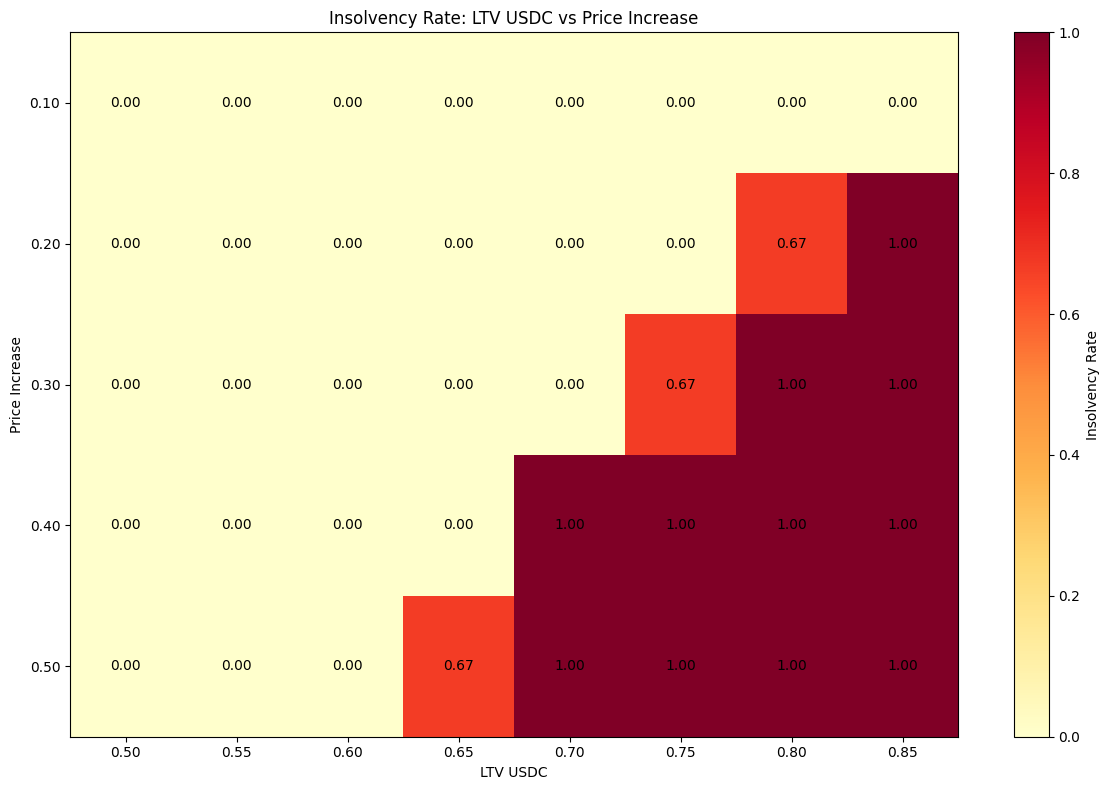

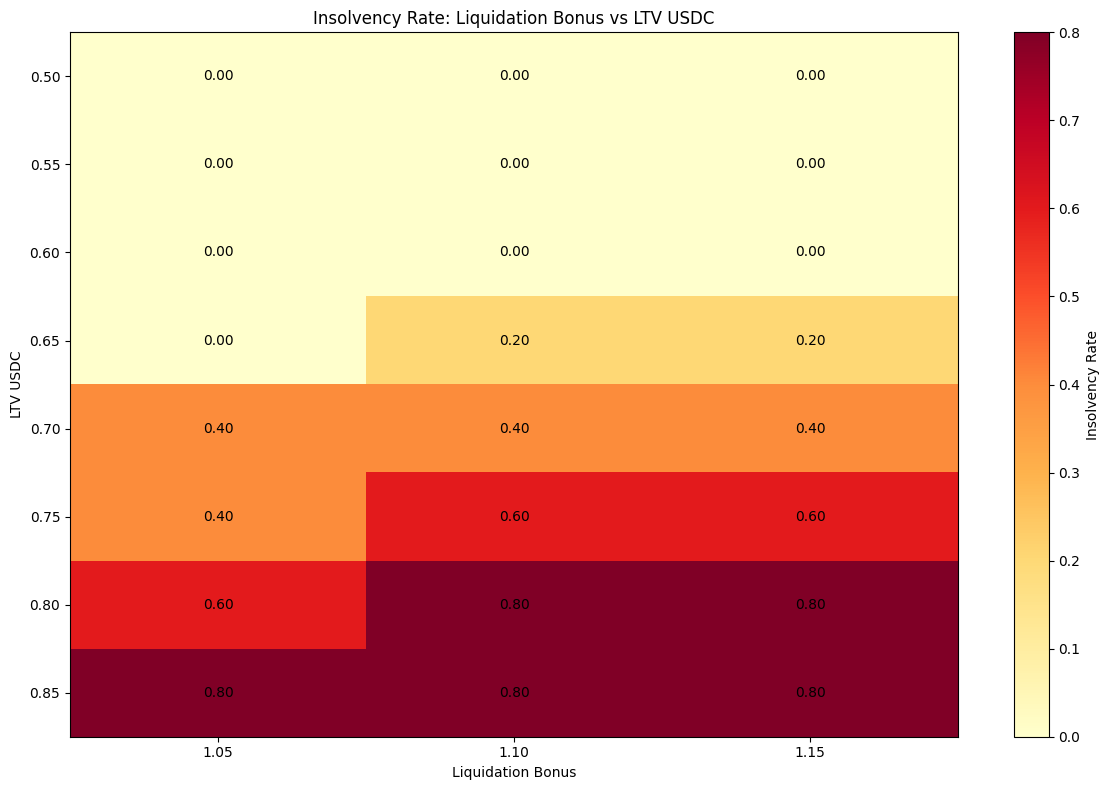

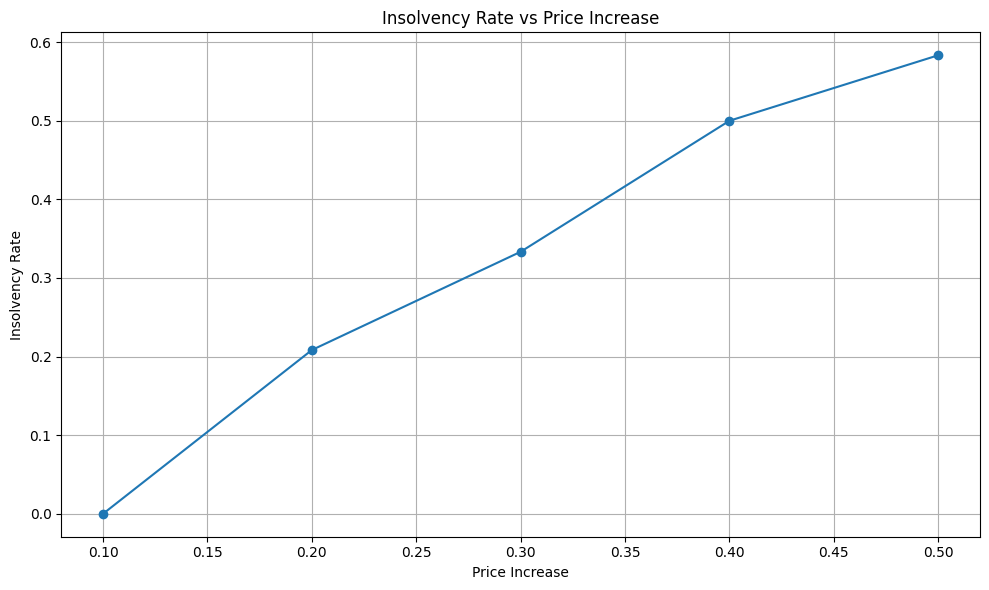

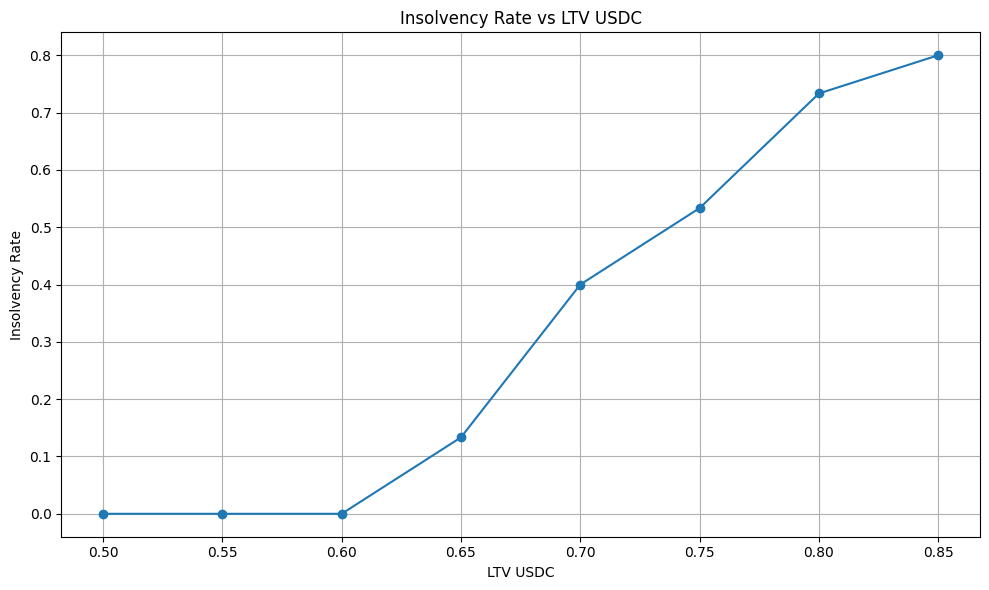

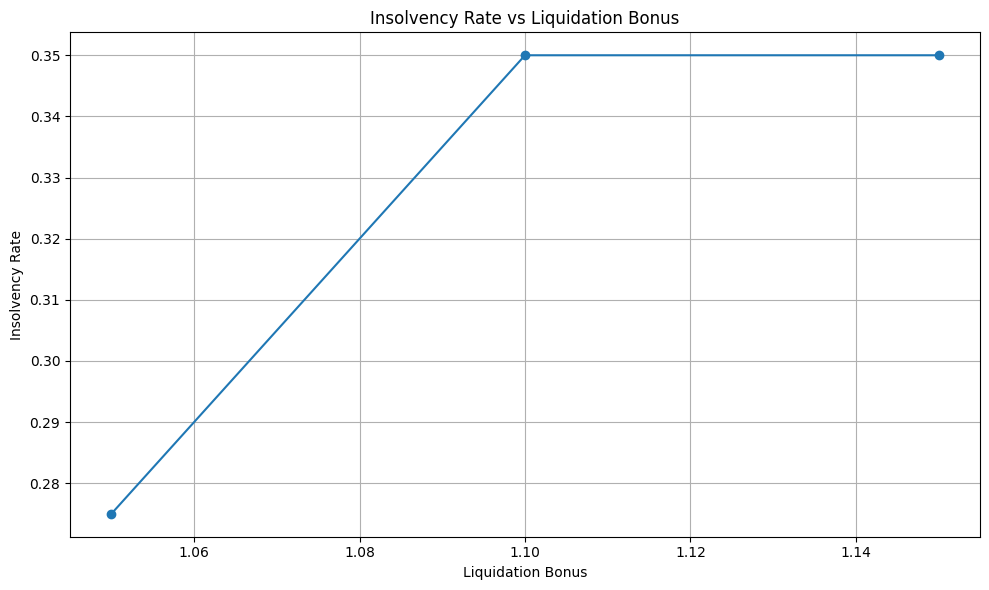


Average Insolvency Rate by Factor:

Price Increase:


Price Increase
0.5    0.583333
0.4    0.500000
0.3    0.333333
0.2    0.208333
0.1    0.000000
Name: Insolvent, dtype: float64


LTV USDC:


LTV USDC
0.85    0.800000
0.80    0.733333
0.75    0.533333
0.70    0.400000
0.65    0.133333
0.50    0.000000
0.55    0.000000
0.60    0.000000
Name: Insolvent, dtype: float64


Liquidation Bonus:


Liquidation Bonus
1.10    0.350
1.15    0.350
1.05    0.275
Name: Insolvent, dtype: float64


Most Risky Configuration:


Price Increase                 0.5
LTV WETH                       0.6
LTV USDC                      0.85
Liquidation Threshold WETH    0.63
Liquidation Threshold USDC    0.88
Liquidation Bonus             1.15
Insolvent                     True
Name: 119, dtype: object


Safest Configuration (highest price increase without insolvency):


Price Increase                  0.5
LTV WETH                        0.6
LTV USDC                       0.65
Liquidation Threshold WETH     0.63
Liquidation Threshold USDC     0.68
Liquidation Bonus              1.05
Insolvent                     False
Name: 105, dtype: object

In [2]:
# Depositing Stable and Borrowing an Volatile asset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

class ZeruLendingProtocol:
    def __init__(self, ltv_weth, ltv_usdc, liq_threshold_weth, liq_threshold_usdc, liq_bonus):
        self.ltv_weth = ltv_weth
        self.ltv_usdc = ltv_usdc
        self.liq_threshold_weth = liq_threshold_weth
        self.liq_threshold_usdc = liq_threshold_usdc
        self.liq_bonus = liq_bonus
        self.usdc_pool = 0
        self.weth_pool = 0
        self.borrowed_weth = 0
        
    def deposit(self, amount, asset):
        if asset == 'USDC':
            self.usdc_pool += amount
        elif asset == 'WETH':
            self.weth_pool += amount
        print(f"Deposited {amount} {asset}")
        
    def borrow(self, amount, collateral_value):
        if amount <= collateral_value * self.ltv_usdc:
            self.borrowed_weth += amount
            self.weth_pool -= amount
            print(f"Borrowed {amount} WETH")
        else:
            print("Borrow amount exceeds allowed LTV")
            
    def calculate_health_factor(self, collateral_value, borrowed_amount, weth_price):
        return (collateral_value * self.liq_threshold_usdc) / (borrowed_amount * weth_price)
    
    def liquidate(self, collateral_value, borrowed_amount, weth_price):
        max_liquidation = min(borrowed_amount * weth_price * 0.5, collateral_value * self.liq_threshold_usdc)
        debt_to_cover = max_liquidation / self.liq_bonus
        collateral_liquidated = max_liquidation
        
        remaining_debt = borrowed_amount * weth_price - debt_to_cover
        remaining_collateral_value = collateral_value - collateral_liquidated
        
        print(f"Debt covered: ${debt_to_cover:.2f}")
        print(f"Collateral liquidated: ${collateral_liquidated:.2f} USDC")
        print(f"Remaining debt: ${remaining_debt:.2f}")
        print(f"Remaining collateral value: ${remaining_collateral_value:.2f}")
        
        return debt_to_cover, collateral_liquidated, remaining_debt, remaining_collateral_value

def run_simulation(initial_weth_price, price_increase_percentage, ltv_weth, ltv_usdc, liq_threshold_weth, liq_threshold_usdc, liq_bonus):
    print(f"\nSimulation with LTV_WETH: {ltv_weth}, LTV_USDC: {ltv_usdc}")
    print(f"Liquidation Threshold WETH: {liq_threshold_weth}, USDC: {liq_threshold_usdc}")
    print(f"Liquidation Bonus: {liq_bonus}")
    print(f"Initial WETH price: ${initial_weth_price}")
    
    protocol = ZeruLendingProtocol(ltv_weth, ltv_usdc, liq_threshold_weth, liq_threshold_usdc, liq_bonus)
    
    # User1 deposits $10,000 worth of WETH
    weth_amount = 10000 / initial_weth_price
    protocol.deposit(weth_amount, 'WETH')
    
    # User2 deposits $10,000 USDC
    protocol.deposit(10000, 'USDC')
    
    # User2 borrows 90% of max LTV in WETH
    borrow_amount = (10000 * ltv_usdc ) / initial_weth_price
    protocol.borrow(borrow_amount, 10000)
    
    print(f"\nInitial state:")
    print(f"USDC pool: {protocol.usdc_pool}")
    print(f"WETH pool: {protocol.weth_pool}")
    print(f"Borrowed WETH: {protocol.borrowed_weth}")
    
    # Price increase
    new_weth_price = initial_weth_price * (1 + price_increase_percentage)
    
    print(f"\nWETH price increased to ${new_weth_price:.2f}")
    
    health_factor = protocol.calculate_health_factor(10000, borrow_amount, new_weth_price)
    print(f"New Health Factor: {health_factor:.4f}")
    
    if health_factor < 1:
        print("\nLiquidation triggered!")
        debt_covered, collateral_liquidated, remaining_debt, remaining_collateral_value = protocol.liquidate(10000, borrow_amount, new_weth_price)
        
        liquidator_profit = debt_covered - (collateral_liquidated / liq_bonus)
        print(f"\nLiquidator profit: ${liquidator_profit:.2f}")
        
        if remaining_collateral_value < remaining_debt:
            protocol_loss = remaining_debt - remaining_collateral_value
            print(f"\nProtocol loss: ${protocol_loss:.2f}")
            print("Protocol is insolvent!")
            return True
        else:
            print("\nProtocol remains solvent.")
            return False
    else:
        print("\nNo liquidation needed. Protocol remains solvent.")
        return False

# Run simulations with different parameters
initial_weth_price = 2000
price_increase_percentages = [0.1, 0.2, 0.3, 0.4, 0.5]
ltv_weth_values = [0.6]
ltv_usdc_values = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
liq_bonus_values = [1.05, 1.10, 1.15]

results = []

for price_increase in price_increase_percentages:
    for ltv_weth in ltv_weth_values:
        for ltv_usdc in ltv_usdc_values:
            for liq_bonus in liq_bonus_values:
                liq_threshold_weth = ltv_weth + 0.03
                liq_threshold_usdc = ltv_usdc + 0.03
                
                is_insolvent = run_simulation(initial_weth_price, price_increase, ltv_weth, ltv_usdc, liq_threshold_weth, liq_threshold_usdc, liq_bonus)
                
                results.append({
                    'Price Increase': price_increase,
                    'LTV WETH': ltv_weth,
                    'LTV USDC': ltv_usdc,
                    'Liquidation Threshold WETH': liq_threshold_weth,
                    'Liquidation Threshold USDC': liq_threshold_usdc,
                    'Liquidation Bonus': liq_bonus,
                    'Insolvent': is_insolvent
                })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results in a table
display(results_df)

# Calculate and display insolvency rate
insolvency_rate = results_df['Insolvent'].mean() * 100
print(f"\nOverall insolvency rate: {insolvency_rate:.2f}%")

# Visualization functions
def plot_insolvency_heatmap(df, x_col, y_col, title):
    pivot = df.pivot_table(values='Insolvent', index=y_col, columns=x_col, aggfunc='mean')
    plt.figure(figsize=(12, 8))
    plt.imshow(pivot, cmap='YlOrRd', aspect='auto')
    plt.colorbar(label='Insolvency Rate')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.xticks(range(len(pivot.columns)), [f"{x:.2f}" for x in pivot.columns])
    plt.yticks(range(len(pivot.index)), [f"{y:.2f}" for y in pivot.index])
    for i in range(len(pivot.index)):
        for j in range(len(pivot.columns)):
            plt.text(j, i, f"{pivot.iloc[i, j]:.2f}", ha='center', va='center')
    plt.tight_layout()
    plt.show()

def plot_insolvency_line(df, x_col, title):
    grouped = df.groupby(x_col)['Insolvent'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(grouped.index, grouped.values, marker='o')
    plt.xlabel(x_col)
    plt.ylabel('Insolvency Rate')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate visualizations
plot_insolvency_heatmap(results_df, 'LTV USDC', 'Price Increase', 'Insolvency Rate: LTV USDC vs Price Increase')
plot_insolvency_heatmap(results_df, 'Liquidation Bonus', 'LTV USDC', 'Insolvency Rate: Liquidation Bonus vs LTV USDC')
plot_insolvency_line(results_df, 'Price Increase', 'Insolvency Rate vs Price Increase')
plot_insolvency_line(results_df, 'LTV USDC', 'Insolvency Rate vs LTV USDC')
plot_insolvency_line(results_df, 'Liquidation Bonus', 'Insolvency Rate vs Liquidation Bonus')

# Additional analysis
print("\nAverage Insolvency Rate by Factor:")
for factor in ['Price Increase', 'LTV USDC', 'Liquidation Bonus']:
    avg_insolvency = results_df.groupby(factor)['Insolvent'].mean().sort_values(ascending=False)
    print(f"\n{factor}:")
    display(avg_insolvency)

# Identify most risky and safest configurations
most_risky = results_df.sort_values('Insolvent', ascending=False).iloc[0]
safest = results_df[results_df['Insolvent'] == False].sort_values('Price Increase', ascending=False).iloc[0]

print("\nMost Risky Configuration:")
display(most_risky)

print("\nSafest Configuration (highest price increase without insolvency):")
display(safest)